https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset 
https://www.kaggle.com/PromptCloudHQ/imdb-data/data
https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd
import numpy as np
import IPython.display
import seaborn as sns
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

meta1 = pd.read_csv("IMDB-Movie-Data.csv")
links = pd.read_csv("ml-latest-small/links.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")
meta2 = pd.read_csv("movie_metadata.csv")

year, title1, title_length = [], [], []
for i in range (len(movies)):
    title = movies['title'][i][0:-7]
    year.append(movies['title'][i][-5:-1])
    title1.append(title)
    title_length.append(len(title.split()))
movies['title'] = title1
movies['title_length'] = title_length
movies['year'] = year

display(movies.head())
ml_table = ratings.merge(movies,on="movieId")
#display(ratings.head())
#display(tags.head())
#display(links.head())
#display(meta1.head(n=3))
#display(meta2)

,movieId,title,genres,title_length,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,2,1995
1,2,Jumanji,Adventure|Children|Fantasy,1,1995
2,3,Grumpier Old Men,Comedy|Romance,3,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,3,1995
4,5,Father of the Bride Part II,Comedy,6,1995


## Tidy up and create an IMBD movie dataset

In [2]:
# Extract the imbd movie ids from inside the link and put into a new column
regex = re.compile(r"\/tt(\d+)")
ids = []
for i in range (len(meta2)):
    match = re.search(regex, meta2['movie_imdb_link'][i])
    ids.append(match.group(1))
meta2['IMDB_ID'] = ids

In [3]:
#Drop columns we dont need
meta2.drop(axis=1, inplace=True, columns=['num_user_for_reviews', 'movie_imdb_link', 'num_critic_for_reviews', 'movie_facebook_likes','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','color','aspect_ratio','cast_total_facebook_likes','facenumber_in_poster'])
 # Another Drop
meta1.drop(axis=1, inplace=True,columns=['Rank'])

In [4]:
#format some of the columns
    # Year column
meta2["Year"] = meta2["title_year"].map(lambda x: str(x)).map(lambda x: 0 if x == 'NaN' else x[:4])
meta2.drop(axis=1,columns=['title_year'], inplace=True)
    # duration column
meta2["Runtime (Minutes)"] = meta2['duration'].map(lambda x: str(x)).map(lambda x: 0 if x == 'NaN' else x[:4])
meta2.drop(axis=1,columns=['duration'], inplace=True)
    # Actor column
meta2['Actors'] = meta2['actor_1_name'] + ', ' + meta2['actor_2_name'] + ', ' + meta2['actor_3_name']
meta2.drop(axis=1, inplace=True,columns=['actor_1_name', 'actor_2_name', 'actor_3_name'])
    # gross column
meta2["Revenue (Millions)"] = meta2["gross"].map(lambda x: str(x)).map(lambda x: 0 if x == 'NaN' else float(x)/1000000)
meta2.drop(axis=1, inplace=True,columns=['gross'])
    # genre column
meta2["Genre"] = (meta2["genres"].map(lambda x: str(x))).map(lambda x: x if x == 'NaN' else x.replace('|', ','))
meta2.drop(axis=1,columns=['genres'], inplace=True)
    # title column
meta2["Title"] = (meta2["movie_title"].map(lambda x: str(x))).map(lambda x: x if x == 'NaN' else x.replace(u'\xa0', u''))
meta2.drop(axis=1,columns=['movie_title'], inplace=True)
    # Rename some columns
meta2.rename(columns={'director_name' : 'Director', 'imdb_score' : 'Rating'}, inplace=True) 
   

imdb_table = pd.concat([meta1, meta2], axis=0, sort=False, join='outer') #The magic

imdb_table.drop_duplicates(subset='Title', keep="last", inplace=True)
display(imdb_table)


,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,num_voted_users,plot_keywords,language,country,content_rating,budget,IMDB_ID
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606.0,138.120000,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545.0,270.320000,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036.0,45.130000,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682.0,151.060000,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490.0,NaN,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188.0,8.010000,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177.0,100.010000,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",The adventures of writer Newt Scamander in New...,David Yates,"Eddie Redmayne, Katherine Waterston, Alison Su...",2016,133,7.5,232072.0,234.020000,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Hidden Figures,"Biography,Drama,History",The story of a team of female African-American...,Theodore Melfi,"Taraji P. Henson, Octavia Spencer, Janelle Mon...",2016,127,7.8,93103.0,169.270000,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118.0,532.170000,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tidy the reviews (ml-latest) data


In [5]:
ml_table["genres"] = (ml_table["genres"].map(lambda x: str(x))).map(lambda x: x if x == 'NaN' else x.replace('|', ','))
display(ml_table.head())
display(tags.head())
display(links.head())

,userId,movieId,rating,timestamp,title,genres,title_length,year
0,1,1,4.0,964982703,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",2,1995
1,5,1,4.0,847434962,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",2,1995
2,7,1,4.5,1106635946,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",2,1995
3,15,1,2.5,1510577970,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",2,1995
4,17,1,4.5,1305696483,Toy Story,"Adventure,Animation,Children,Comedy,Fantasy",2,1995


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


It may be useful to be able to view trends for movies of a specific genre. Lets see what we can do:

In [17]:
imdb_table.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,5039,5040,5041,5042,5043,5044,5045,5046,5047,5048,5049,5050,5051,5052,5053,5054,5055,5056,5057,5058,5059,5060,5061,5062,5063,5064,5065,5066,5067,5068,5069,5070,5071,5072,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086,5087,5088,5089,5090,5091,5092,5093,5094,5095,5096,5097,5098,5099,5100,5101,5102,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112,5113,5114,5115,5116,5117,5118,5119,5120,5121,5122,5123,5124,5125,5126,5127,5128,5129,5130,5131,5132,5133,5134,5135,5136,5137,5138,5139,5140,5141,5142,5143,5144,5145,5146,5147,5148,5149,5150,5151,5152,5153,5154,5155,5156,5157,5158,5159,5160,5161,5162,5163,5164,5165,5166,5167,5168,5169,5170,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210,5211,5212,5213,5214,5215,5216,5217,5218,5219,5220,5221,5222,5223,5224,5225,5226,5227,5228,5229,5230,5231,5232,5233,5234,5235,5236,5237,5238,5239,5240,5241,5242,5243,5244,5245,5246,5247,5248,5249,5250,5251,5252,5253,5254,5255,5256,5257,5258,5259,5260,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270,5271,5272,5273,5274,5275,5276,5277,5278,5279,5280,5281,5282,5283,5284,5285,5286,5287,5288
index,2,3,5,6,7,8,9,10,11,12,13,14,16,18,19,20,21,22,23,25,26,27,29,30,31,34,37,38,39,41,42,43,44,46,47,49,50,51,52,53,55,56,58,59,61,65,66,68,69,71,72,73,74,81,84,86,89,93,95,96,97,98,103,105,106,108,110,112,114,115,117,119,120,122,123,130,134,139,145,146,149,152,154,155,160,161,163,171,172,180,181,183,184,185,186,187,190,191,193,196,201,202,205,206,207,209,213,217,218,220,225,226,229,231,236,237,242,247,248,249,250,251,259,262,263,265,269,273,274,278,279,282,283,286,288,290,293,295,296,307,311,312,317,321,327,330,335,337,340,350,352,353,356,361,367,370,375,378,380,382,393,398,401,405,413,414,416,418,421,428,430,434,435,437,439,444,447,451,455,462,463,467,477,478,479,483,484,500,501,502,503,504,505,507,510,513,519,520,522,523,525,528,531,532,534,537,538,539,541,542,546,548,549,551,553,554,568,574,577,590,591,592,597,601,605,608,611,615,616,618,621,622,623,627,628,633,637,641,643,644,647,648,649,650,651,653,654,659,661,662,...,4792,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806,4807,4808,4809,4810,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823,4824,4825,4826,4827,4828,4829,4830,4831,4832,4833,4834,4835,4836,4837,4838,4839,4840,4841,4842,4843,4844,4845,4846,4847,4848,4849,4850,4851,4852,4853,4854,4855,4856,4857,4858,4859,4860,4861,4862,4863,4864,4865,4866,4867,4868,4869,4870,4871,4872,4873,4874,4875,4876,4877,4878,4879,4880,4881,4882,4883,4884,4885,4886,4887,4888,4889,4890,4891,4892,4893,4894,4895,4896,4897,4898,4899,4900,4901,4902,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912,4913,4914,4915,4916,4917,4918,4919,4920,4921,4922,4923,4924,4925,4926,4927,4928,4929,4930,4931,4932,4933,4934,4935,4936,4937,4938,4939,4940,4941,4942,4943,4944,4945,4946,4947,4948,4950,4951,4952,4953,4954,4955,4956,4957,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973,4974,4975

In [7]:
#Reset index 
imdb_table = imdb_table.reset_index()

genre_list = imdb_table['Genre'].map(lambda x: x.split(','))
imdb_table['Genre'] = genre_list

all_genres = []

#list of all genre tags from every movie
for i in range(len(genre_list)):
    all_genres = all_genres + genre_list[i]
    
#list of unique 
all_genres = pd.DataFrame(data=all_genres, columns={'genre'}).genre.unique()

In [10]:
#Takes a list of genres, and a dataframe of movie entries
#Returns dataframe with only movies that include genre tags in genres parameter
def filter_by_genre(genres, df):
    if len(genres) > 0 :
        line = df['Genre'].map(lambda x: True if genres[0] in x else False )
        return filter_by_genre(genres[1:], df[line])
    else :
        return df

#Takes a list of genres, a table, x param and y param
#Plots features for movies with genres in genres param
def plot_genre_attributes(genres, table, xIn, yIn):
    genre_df = filter_by_genre(genres, table)
    sns.scatterplot(x=xIn, y=yIn, data=genre_df)
    string = ''.join( x + " " for x in genres)
    
    plt.title(string + " movies: " + yIn + " vs. " + xIn)
    plt.xlabel(xIn)
    plt.ylabel(yIn)
    plt.show()

In [ ]:
for x in all_genres: 
    plot_genre_attributes([x], imdb_table, 'Year','Revenue (Millions)')

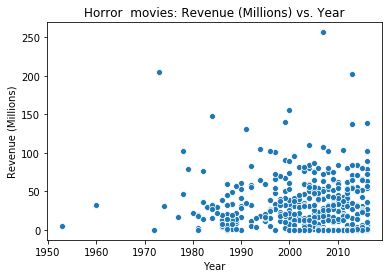

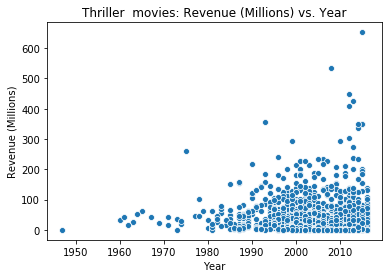

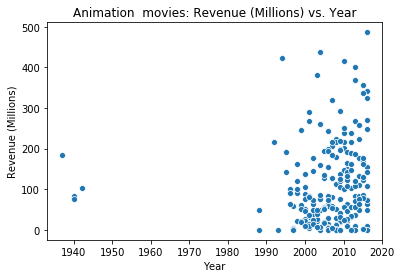

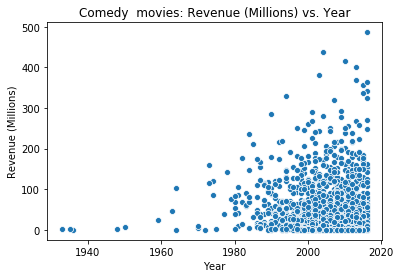

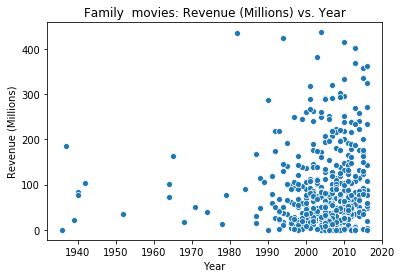

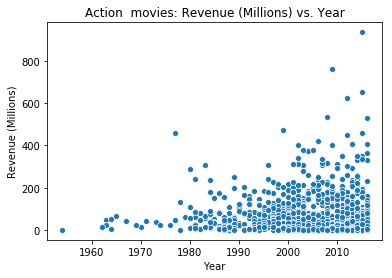

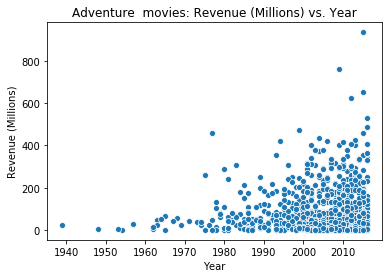

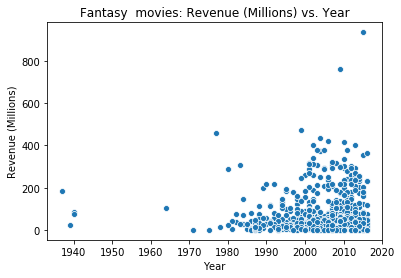

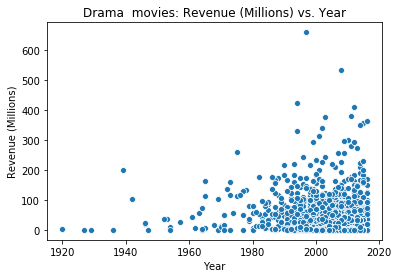

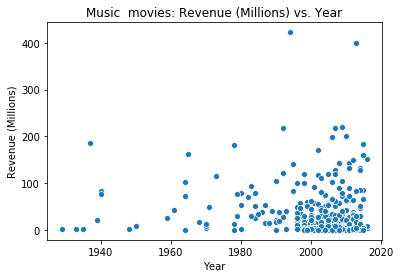

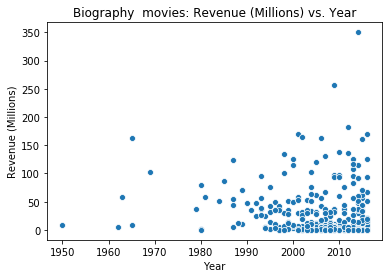

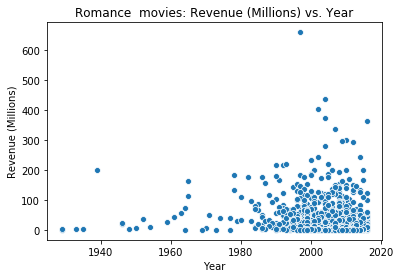

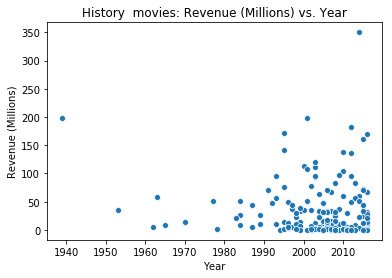

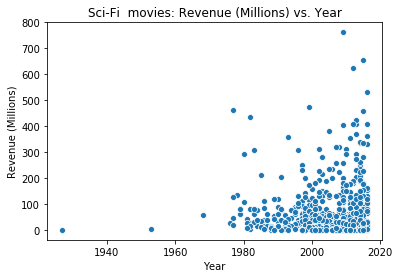

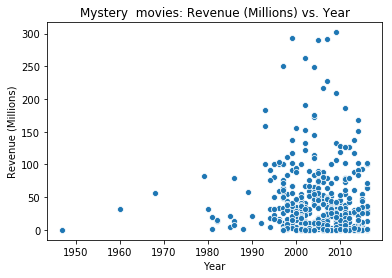

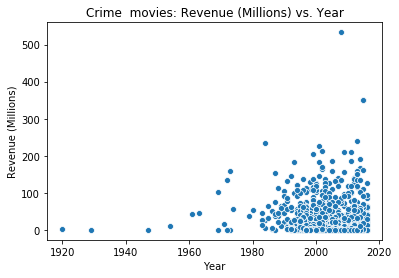

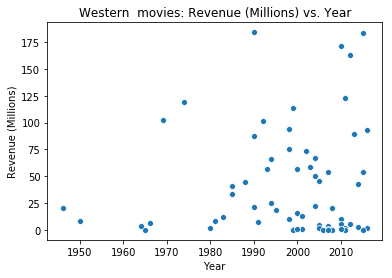

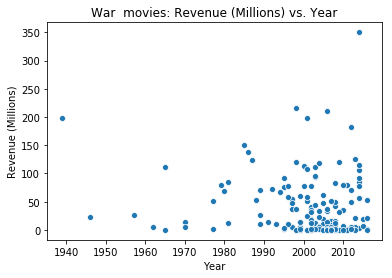

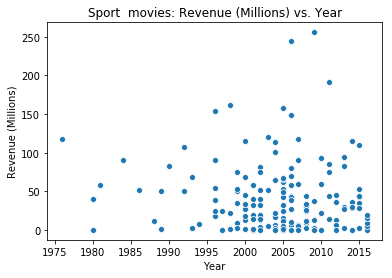

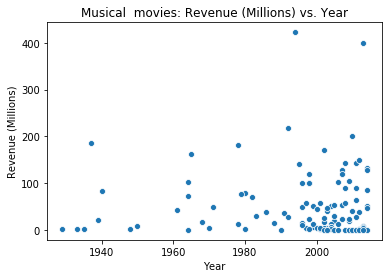

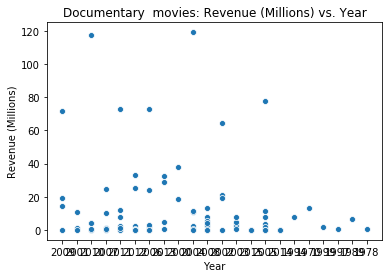

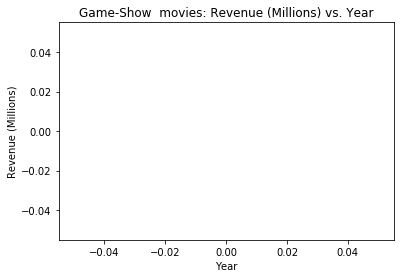

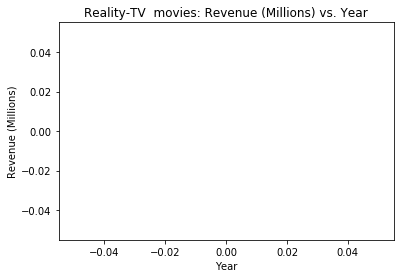

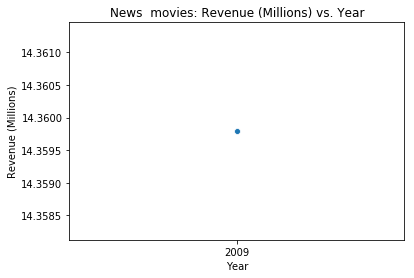

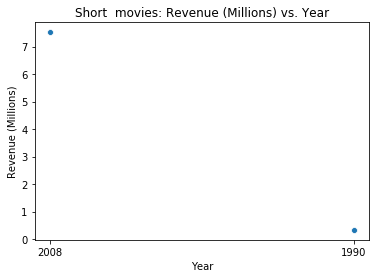

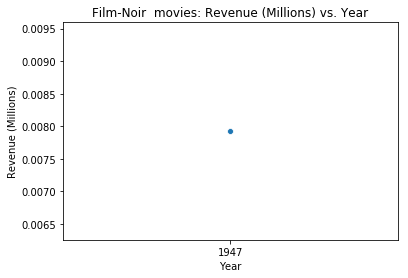

In [13]:
for x in all_genres: 
    plot_genre_attributes([x], imdb_table, 'Year','Revenue (Millions)')

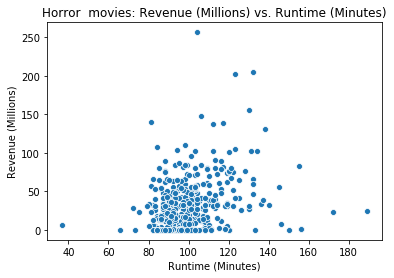

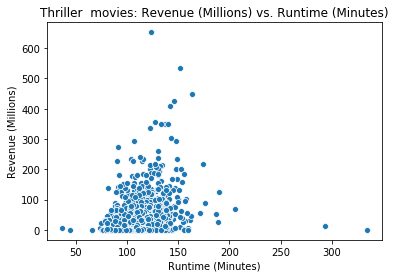

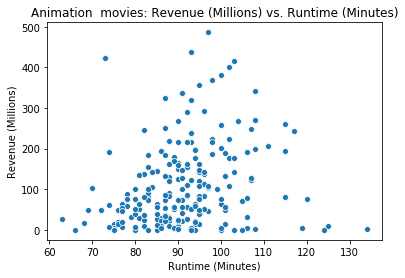

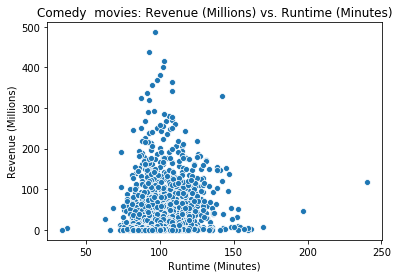

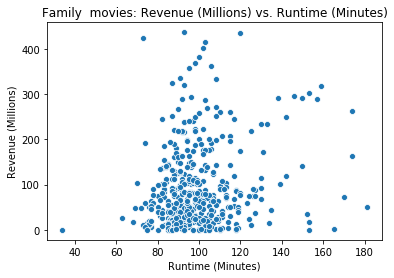

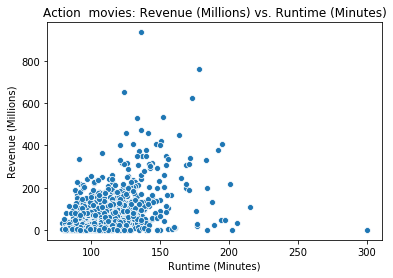

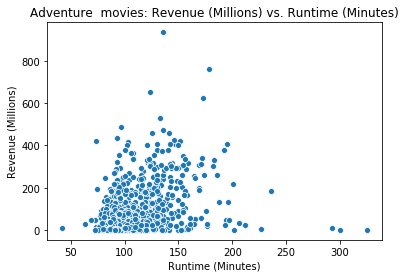

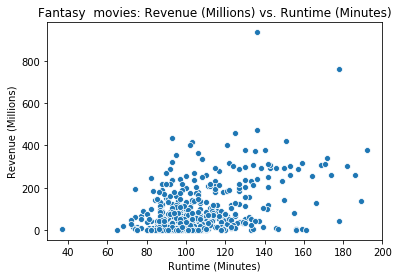

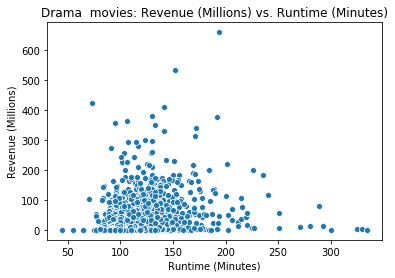

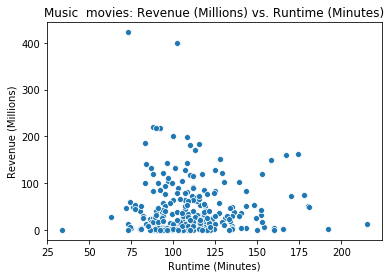

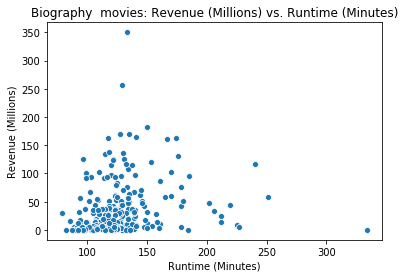

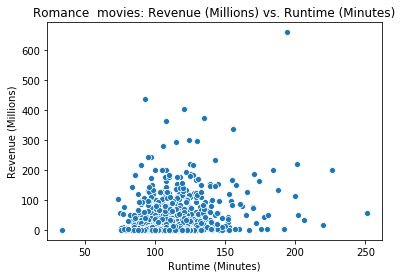

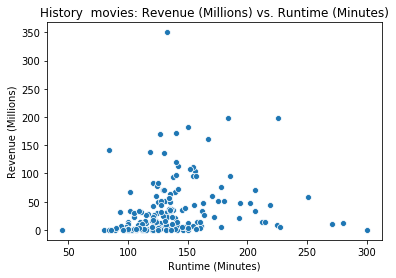

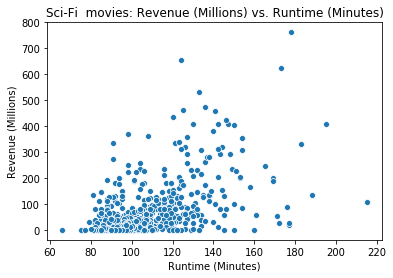

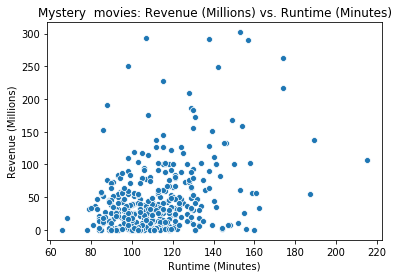

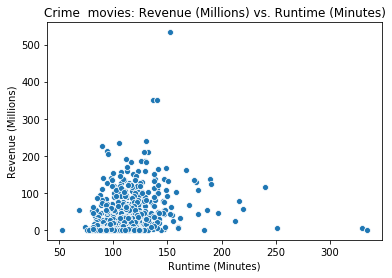

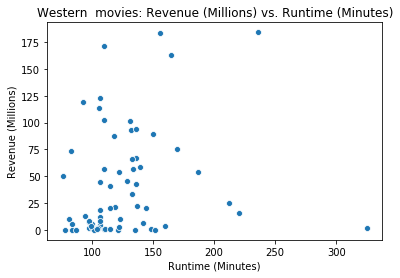

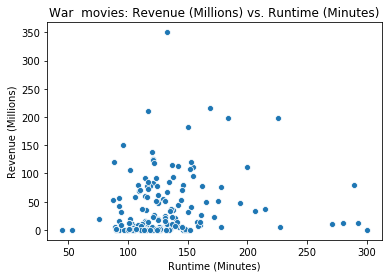

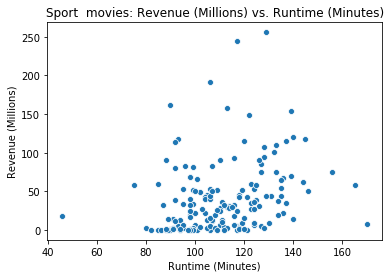

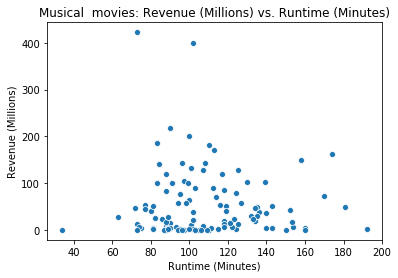

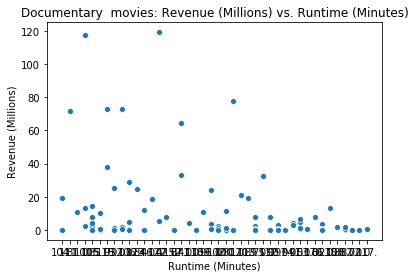

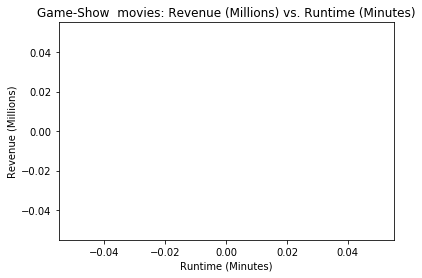

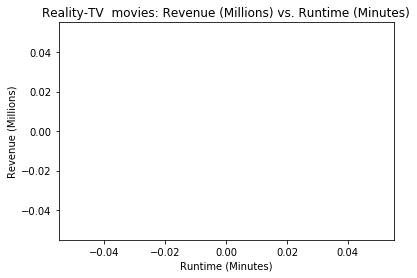

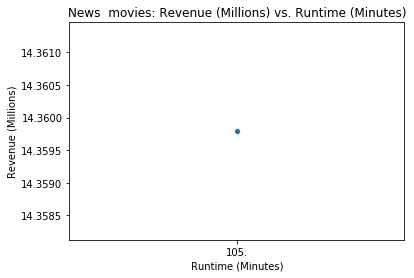

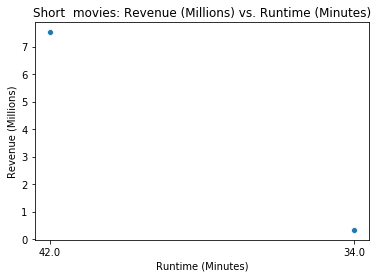

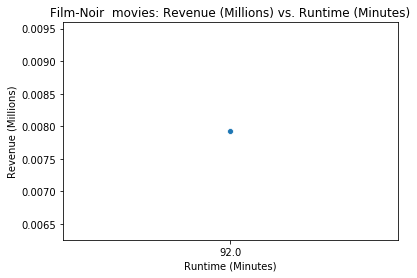

In [16]:
for x in all_genres: 
    plot_genre_attributes([x], imdb_table,'Runtime (Minutes)', 'Revenue (Millions)')